# Data Analysis

### SEN9120: Advanced Agent Based Modeling
Cruz Torres Francesco, 4999959
<br> Herzog Rico, 5095530

In [138]:
# Import necessary scintific computing, data analysis and visualization packages
%matplotlib inline
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import seaborn as sns


import scipy.stats as stats
import statistics
import math

In [139]:
for name in sorted(os.listdir("./results")):
    print(name)

outcomes2021-2-6-20-18.csv
outcomes2021-2-6-21-00.csv
outcomes2021-2-7-0-32_50 samples.csv
outcomes2021-2-9-3-42_150 samples.csv
parameters2021-2-6-20-18.csv
parameters2021-2-6-21-00.csv
parameters2021-2-7-0-32_50 samples.csv
parameters2021-2-9-3-42_150 samples.csv


In [140]:
#access all results files and store them in dataframes

count_outcomes = 1
count_parameters = 1

for name in sorted(os.listdir("./results")):
    path = os.path.join("./results", name)
        
    if "outcomes" in name:
        globals()["outcomes_"+str(count_outcomes)] = pd.read_csv(path)
        count_outcomes += 1
        
    #othwerwise the filename starts with "parameters"
    else:
        globals()["parameters_"+str(count_parameters)] = pd.read_csv(path)
        count_parameters += 1

In [141]:
# for each couple of files (parameters ; outcome) merge the two files together
for i,j in zip(range(1,count_parameters), range(1,count_outcomes)):
    globals()["results_"+str(i)] = pd.merge(globals()["parameters_"+str(i)], globals()["outcomes_"+str(i)], left_on= "Unnamed: 0", right_on= "Run").drop("Unnamed: 0", axis=1)

In [142]:
# adjust the "Run" column such that each run is unique across all results files
results_2["Run"] = results_2["Run"] + results_1["Run"].iloc[-1] + 1
results_3["Run"] = results_3["Run"] + results_2["Run"].iloc[-1] + 1
results_4["Run"] = results_4["Run"] + results_3["Run"].iloc[-1] + 1
results_4["Run"]

0         70
1         70
2         70
3         70
4         70
        ... 
14995    219
14996    219
14997    219
14998    219
14999    219
Name: Run, Length: 15000, dtype: int64

In [144]:
# combine all results dataframes into one dataframe, where Run is the unique key column
results = pd.concat([results_1, results_2, results_3, results_4], axis = 0)
results["MW_Total"] = results.iloc[:, -3:].sum(axis=1)
results

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Run,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
0,8.0,8.0,15.0,1.0,4.0,1.0,True,0,0,40.0,325.0,166.5,531.5
1,8.0,8.0,15.0,1.0,4.0,1.0,True,0,1,60.0,179.0,159.0,398.0
2,8.0,8.0,15.0,1.0,4.0,1.0,True,0,2,64.0,90.0,145.5,299.5
3,8.0,8.0,15.0,1.0,4.0,1.0,True,0,3,48.0,178.0,147.0,373.0
4,8.0,8.0,15.0,1.0,4.0,1.0,True,0,4,50.0,385.0,172.5,607.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,15.0,11.0,-4.0,2.0,2.0,False,219,95,85.0,269.0,262.5,616.5
14996,0.0,15.0,11.0,-4.0,2.0,2.0,False,219,96,55.0,179.0,214.5,448.5
14997,0.0,15.0,11.0,-4.0,2.0,2.0,False,219,97,50.0,165.0,282.0,497.0
14998,0.0,15.0,11.0,-4.0,2.0,2.0,False,219,98,90.0,149.0,253.5,492.5


## Exploration of Variety 
How much does the random seed affect the outcomes of any given lever space combination?

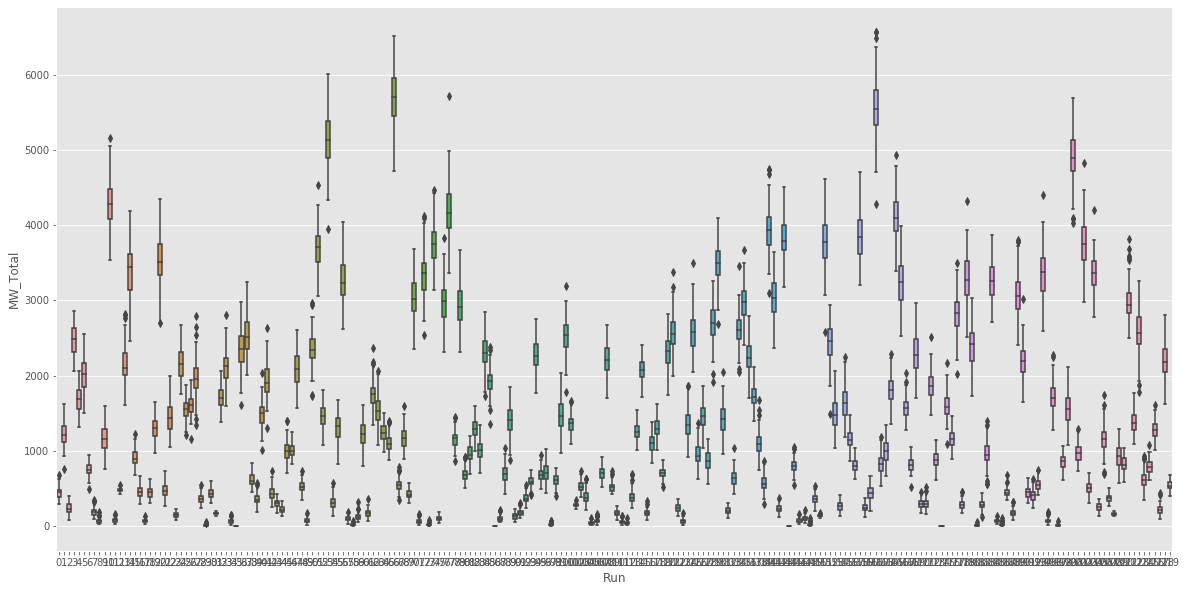

In [145]:
fig = sns.boxplot(x = results["Run"], y = results["MW_Total"])
fig.figure.set_size_inches(20, 10)

## Exploration of the Lever space
These pair plots show how the combinations of various parameters affect the outcome on terms of total GWH produced. 

In [146]:
lever_space = results.groupby("Run").mean()
lever_space["MW_Total"] = lever_space.iloc[:, -3:].sum(axis=1)
lever_space

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
0,8.0,8.0,15.0,1.0,4.0,1.0,True,49.5,54.25,231.13,157.725,831.96
1,15.0,15.0,14.0,-4.0,-2.0,11.0,False,49.5,158.65,728.00,327.900,2270.45
2,19.0,5.0,20.0,-1.0,-4.0,14.0,False,49.5,31.22,131.17,74.280,442.12
3,7.0,25.0,3.0,2.0,-2.0,15.0,False,49.5,330.16,1484.64,656.100,4611.64
4,4.0,18.0,11.0,5.0,4.0,22.0,False,49.5,223.61,1005.85,458.355,3152.02
...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.0,14.0,4.0,2.0,-1.0,21.0,False,49.5,102.53,404.84,285.870,1483.95
216,3.0,18.0,22.0,3.0,-4.0,6.0,True,49.5,170.60,687.84,418.350,2382.98
217,25.0,5.0,6.0,-3.0,1.0,2.0,False,49.5,27.63,117.26,74.520,411.19


In [147]:
sns.pairplot(lever_space.iloc[:,[0,1,2,3,4,5,6,-1]], hue="MW_Total", height=3)

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must hav

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DDADCF59D8> (for post_execute):


KeyboardInterrupt: 

## Explore which levers lead to the best outcomes
We take the minimum value across all random seeds as the measure for the best outcome and select the Top 10% of all the scenarios.

In [148]:
best_cases = results.groupby("Run").min()
best_cases = best_cases[best_cases["MW_Total"] > best_cases["MW_Total"].quantile(0.9)]
best_cases

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
10,19.0,23.0,14.0,1.0,-5.0,23.0,True,0,484.0,2164.0,636.0,3541.5
20,23.0,22.0,8.0,-5.0,-5.0,24.0,True,0,350.0,1628.0,544.5,2694.0
51,13.0,23.0,18.0,4.0,4.0,15.0,False,0,370.0,1939.0,625.5,3051.0
53,19.0,24.0,13.0,2.0,-3.0,19.0,True,0,602.0,2535.0,742.5,3945.5
56,24.0,18.0,9.0,1.0,-2.0,12.0,False,0,303.0,1556.0,483.0,2615.5
66,22.0,24.0,11.0,5.0,-1.0,11.0,False,0,760.0,2942.0,765.0,4712.0
72,21.0,18.0,24.0,1.0,1.0,20.0,True,0,377.0,1548.0,490.5,2536.5
74,16.0,24.0,4.0,-2.0,5.0,19.0,True,0,365.0,1865.0,642.0,3135.5
77,20.0,24.0,24.0,0.0,-3.0,18.0,False,0,425.0,2173.0,667.5,3356.5


# PRIM Algorithm

In [149]:
# Imports
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

In [183]:
results = results.groupby(["Run"]).min()
results

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
0,8.0,8.0,15.0,1.0,4.0,1.0,True,0,25.0,89.0,117.0,294.5
1,15.0,15.0,14.0,-4.0,-2.0,11.0,False,0,95.0,358.0,277.5,760.5
2,19.0,5.0,20.0,-1.0,-4.0,14.0,False,0,5.0,0.0,52.5,85.0
3,7.0,25.0,3.0,2.0,-2.0,15.0,False,0,237.0,1116.0,586.5,2055.5
4,4.0,18.0,11.0,5.0,4.0,22.0,False,0,143.0,683.0,397.5,1311.0
...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.0,14.0,4.0,2.0,-1.0,21.0,False,0,55.0,209.0,243.0,609.0
216,3.0,18.0,22.0,3.0,-4.0,6.0,True,0,99.0,431.0,376.5,1006.5
217,25.0,5.0,6.0,-3.0,1.0,2.0,False,0,5.0,0.0,48.0,100.0


In [191]:
x = results.iloc[:,:7]
y = results.iloc[:, -1] > results.iloc[:, -1].quantile(0.78)
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] 220 points remaining, containing 49 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.08181818181818182, coverage: 0.3673469387755102, density: 1.0 restricted_dimensions: 5


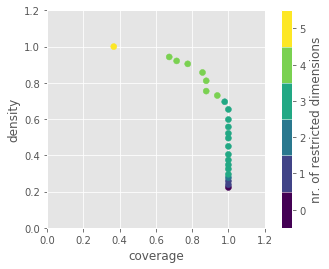

In [194]:
box1.show_tradeoff()
plt.show()

In [195]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.222727,0,1.000000,0.222727,0
1,1.000000,0.237864,1,0.936364,0.237864,1
2,1.000000,0.257895,2,0.863636,0.257895,1
3,1.000000,0.276836,3,0.804545,0.276836,2
4,1.000000,0.295181,4,0.754545,0.295181,3
5,1.000000,0.324503,5,0.686364,0.324503,3
6,1.000000,0.347518,6,0.640909,0.347518,3
7,1.000000,0.374046,7,0.595455,0.374046,3
8,1.000000,0.404959,8,0.550000,0.404959,3
9,1.000000,0.449541,9,0.495455,0.449541,3


coverage     0.367347
density             1
id                 23
mass        0.0818182
mean                1
res_dim             5
Name: 23, dtype: object

                                  box 23          \
                                     min     max   
total-project-proposal-frequency    16.5      25   
administrative-network-meetings     11.5      25   
random-intial-trust               {True}  {True}   
green-energy-openness-change        -2.5       5   
max-project-capacity                 1.5      25   

                                                                  
                                                       qp values  
total-project-proposal-frequency  [2.3791283092767746e-07, -1.0]  
administrative-network-meetings    [0.0006766394845988637, -1.0]  
random-intial-trust                    [0.346757704653667, -1.0]  
green-energy-openness-change          [0.4492697795846896, -1.0]  
max-project-capacity                                 [1.0, -1.0]  



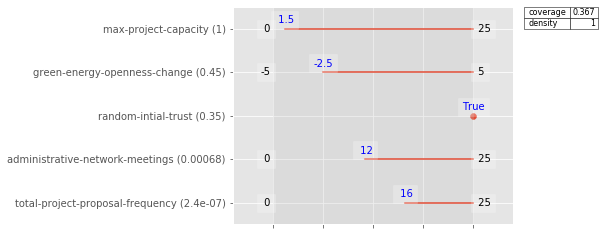

In [196]:
box1.inspect(23);
box1.inspect(23, style='graph');
plt.show()

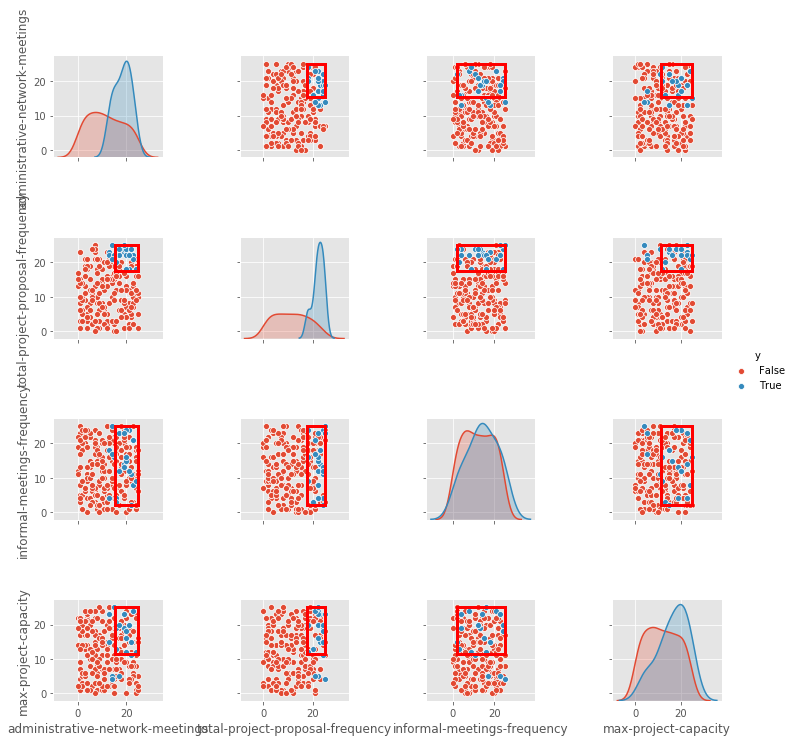

In [188]:
box1.show_pairs_scatter(29)
plt.show(29)